<a href="https://colab.research.google.com/github/farsim-hossain/python-projects/blob/main/Various_ways_to_load_data_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load CSV Data
We will learn various methods of loading csv files. "There are things beyond our imagination."

In [1]:
import pandas as pd 
import numpy as np 

np.set_printoptions(precision =3, suppress = True)

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing 



For any small CSV dataset the simplest way to train a TensorFlow model on it is to load it into memory as a pandas Dataframe or a NumPy array.

In [2]:
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
                            names = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

Lets pach the feature into a single numpy array 

In [4]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

Next make a regression model predict the age. Since there is only a single input tensor, a keras.Sequential model is sufficient here.

In [5]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)]
)

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [6]:
abalone_model.fit(abalone_features, abalone_labels, epochs = 10)

Epoch 1/10
104/104 [==============================] - 1s 888us/step - loss: 85.3764
Epoch 2/10
104/104 [==============================] - 0s 859us/step - loss: 17.0604
Epoch 3/10
104/104 [==============================] - 0s 914us/step - loss: 8.9593
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 8.2175
Epoch 5/10
104/104 [==============================] - 0s 974us/step - loss: 7.9350
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 7.2673
Epoch 7/10
104/104 [==============================] - 0s 905us/step - loss: 7.1767
Epoch 8/10
104/104 [==============================] - 0s 879us/step - loss: 7.0608
Epoch 9/10
104/104 [==============================] - 0s 928us/step - loss: 6.4113
Epoch 10/10
104/104 [==============================] - 0s 879us/step - loss: 6.4813


## Apply basic preprocessing

It's good practice to normalize the inputs to your model. The experimental.preprocessing layers provide a convenient way to build this normalization into your model.

The layer will precompute the mean and variance of each column, and use these to normalize the data.

First you create the layer:

In [7]:
normalize = preprocessing.Normalization()

Then you use the Normalization.adapt() method to adapt the normalization layer to your data.

In [8]:
normalize.adapt(abalone_features)



Then use normalization layers in the model

In [9]:
norm_abalone_model = tf.keras.Sequential(
    [
     normalize,
     layers.Dense(64),
     layers.Dense(1)
    ]
)

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features,abalone_labels, epochs =10)

Epoch 1/10
104/104 [==============================] - 0s 924us/step - loss: 104.6584
Epoch 2/10
104/104 [==============================] - 0s 893us/step - loss: 67.7098
Epoch 3/10
104/104 [==============================] - 0s 937us/step - loss: 24.6416
Epoch 4/10
104/104 [==============================] - 0s 996us/step - loss: 7.1822
Epoch 5/10
104/104 [==============================] - 0s 922us/step - loss: 5.7362
Epoch 6/10
104/104 [==============================] - 0s 879us/step - loss: 5.2818
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1274
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1435
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9934
Epoch 10/10
104/104 [==============================] - 0s 907us/step - loss: 5.0798


## Preprocessing of mixed data types 

In [10]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [11]:
titanic.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Since the dataset is a mix of numerical and cat data, In this example, you'll build a model that implements the preprocessing logic using Keras functional API. You could also do it by subclassing.

In [12]:
# create a symbolic input 

input = tf.keras.Input(shape = (), dtype = tf.float32)

# tensorflow 1/infinite calculation model
result = 1*input + 1

result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [14]:
#  mystery again, lesson learned
calc = tf.keras.Model(inputs = input, outputs = result)

print(calc(1).numpy())
print(calc(2).numpy())

2.0
3.0


Preprocessin model, here we will make a dictionary of the data types of columns.

In [16]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype ==object:
    dtype = tf.string
  else :
    dtype = tf.float32
  inputs[name] = tf.keras.Input(shape = (1,), name = name, dtype=dtype)

inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>}

We got the cat variables list. Now lets get the num varialbles

In [17]:
numeric_inputs = {name:input for name,input in inputs.items() if input.dtype == tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

Now we got the numeric and cat variables in tensors. Now lets concatenate the cat and num vars 

In [18]:
preprocessed_inputs = [all_numeric_inputs]

For the string inputs use the preprocessing.StringLookup function to map from strings to integer indices in a vocabulary. Next, use preprocessing.CategoryEncoding to convert the indexes into float32 data appropriate for the model.
The default settings for the preprocessing.CategoryEncoding layer create a one-hot vector for each input. 


In [20]:
for name, input in inputs.items():
  if input.dtype ==tf.float32:
    continue
# if inout.dtype is cat, then
  lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = preprocessing.CategoryEncoding(max_tokens= lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)



In the above code all the inputs became numeric
With the collection of inputs and processed_inputs, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

In [22]:
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_4')>]

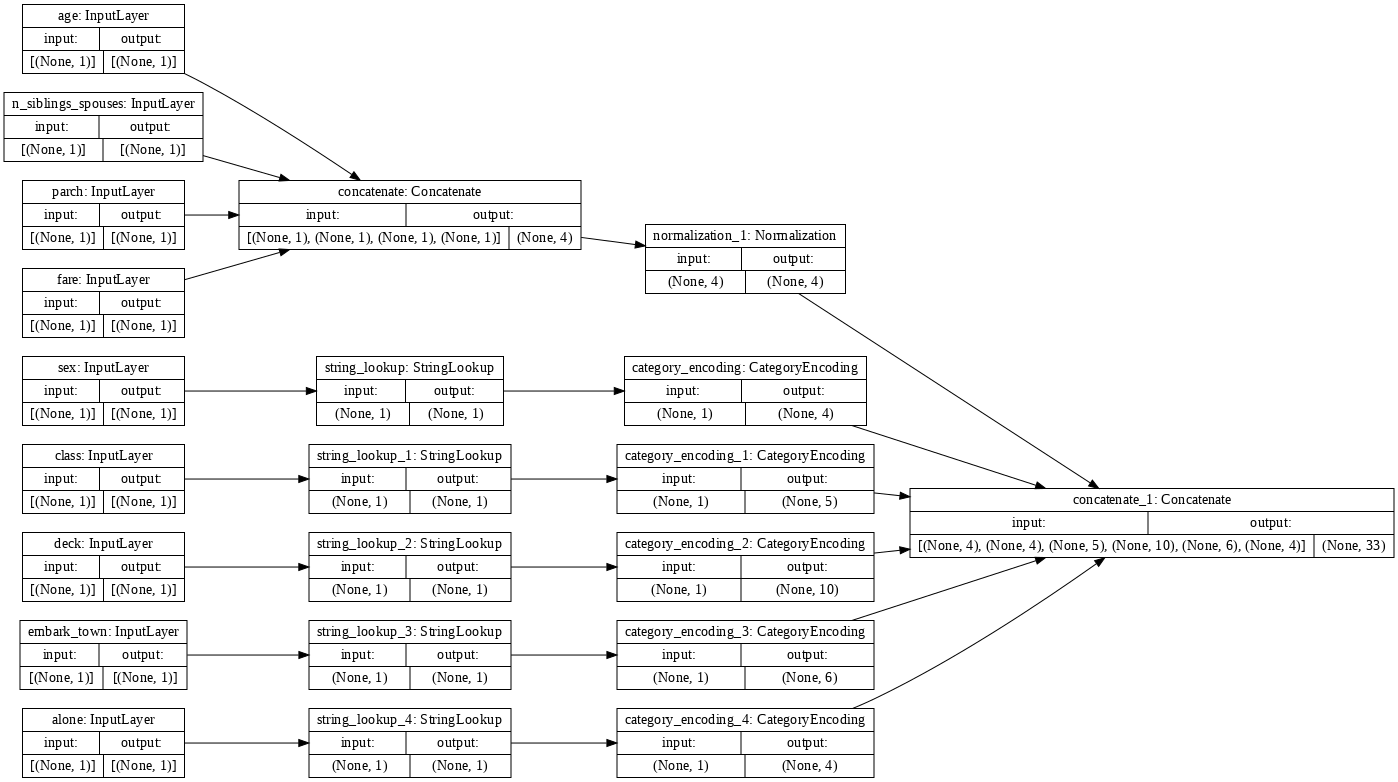

In [23]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir = "LR", dpi =72, show_shapes= True)


The above model shows how tensorflow takes in the preprocessed inputs. To know how a particular model takes in the inputs and works, its only reasonable if we know the ins and outs of a framework. 

This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert Pandas DataFrames because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So convert it to a dictionary of tensors:

In [24]:
titanic_features_dict = {name:np.array(value) for name, value in titanic_features.items()}


Slice out the first training example and pass it to this preprocessing model, you see the numeric features and string one-hots all concatenated together:

In [25]:
features_dict = {name:values[:1] for name,values in titanic_features_dict.items()}

titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]], dtype=float32)>

We got the preprocessed inputs . Now its time for modelling

In [27]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
                              layers.Dense(64),
                              layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss = tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer = tf.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [28]:
titanic_model.fit(x = titanic_features_dict, y = titanic_labels, epochs= 10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.6455
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5719
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4953
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4839
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4791
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4676
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4020
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4241
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4192


Since there is a huge preprocesing task, we can save the model.

In [29]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test/assets


In [30]:
features_dict = {name:values[:1] for name,values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before
      )
print(after )

#checking the difference of applying saved preprocess

tf.Tensor([[-1.905]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.905]], shape=(1, 1), dtype=float32)


## Another preprocessing tf.data

In the previous section you relied on the model's built-in data shuffling and batching while training the model.

If you need more control over the input data pipeline or need to use data that doesn't easily fit into memory: use tf.data.

As a first example of applying tf.data to CSV data consider the following code to manually slice up the dictionary of features from the previous section. For each index, it takes that index for each feature:

In [31]:
import itertools

def slices(features):
  for i in itertools.count():
    example = {name:values[i] for name, values in features.items()}
    yield example 

for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}:{value}")

  break

sex                :male
age                :22.0
n_siblings_spouses :1
parch              :0
fare               :7.25
class              :Third
deck               :unknown
embark_town        :Southampton
alone              :n


## Now this 

The most basic tf.data.Dataset in memory data loader is the Dataset.from_tensor_slices constructor. This returns a tf.data.Dataset that implements a generalized version of the above slices function, in TensorFlow.

In [33]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict) #from_tensor_slices is the automated function that we tried manually earlier
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}:{value}")

  break

sex                :b'male'
age                :22.0
n_siblings_spouses :1
parch              :0
fare               :7.25
class              :b'Third'
deck               :b'unknown'
embark_town        :b'Southampton'
alone              :b'n'


In [34]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

To train a model ,we need to shuffle and batch the data

In [35]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

Now that we have the features and labels in the batch, 
we will pass the batch into the model

In [36]:
titanic_model.fit(titanic_batches, epochs = 5)

Epoch 1/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4235
Epoch 2/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4226
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4203
Epoch 4/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4204
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4206


# From a single file
So far this tutorial has worked with in-memory data. tf.data is a highly scalable toolkit for building data pipelines, and provides a few functions for dealing loading CSV files.

In [37]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")


32768/30874 [===============================] - 0s 0us/step


After getting the file, we will read into csv

In [39]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size =5,
    label_name = 'survived',
    num_epochs =1,
    ignore_errors = True
)

This new method has some benefits. This function includes many convenient features so the data is easy to work with. This includes:

Using the column headers as dictionary keys.
Automatically determining the type of each column.

In [40]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}:{value}")
  print()
  print(f"{'label':20s}:{label}")

sex                 :[b'female' b'female' b'male' b'female' b'male']
age                 :[50.  18.  34.5 32.  25. ]
n_siblings_spouses  :[0 1 0 1 1]
parch               :[0 0 0 1 0]
fare                :[10.5   17.8    6.438 15.5    7.775]
class               :[b'Second' b'Third' b'Third' b'Third' b'Third']
deck                :[b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         :[b'Southampton' b'Southampton' b'Cherbourg' b'Queenstown' b'Southampton']
alone               :[b'y' b'n' b'y' b'n' b'n']

label               :[1 0 0 0 1]


## Excellent new machine to look up values 
This can also decompress the data on the fly. Here is a gzipped csv 

In [41]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir = '.', cache_subdir = 'traffic'
)

409600/405373 [==============================] - 0s 1us/step


Set the compression_type afg to read directly from the compressed file

In [42]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size = 256,
    label_name = 'traffic_volume',
    num_epochs =1,
    compression_type = 'GZIP'
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}:{value[:5]}")

  print()
  print(f"{'label':20s}:{label[:5]}")

holiday             :[b'None' b'None' b'None' b'None' b'None']
temp                :[298.356 273.05  282.85  298.15  292.32 ]
rain_1h             :[0. 0. 0. 0. 0.]
snow_1h             :[0. 0. 0. 0. 0.]
clouds_all          :[ 0 75 20 40  8]
weather_main        :[b'Clear' b'Clouds' b'Clouds' b'Clouds' b'Clear']
weather_description :[b'Sky is Clear' b'broken clouds' b'few clouds' b'scattered clouds'
 b'sky is clear']
date_time           :[b'2013-09-06 22:00:00' b'2013-01-08 12:00:00' b'2012-10-23 04:00:00'
 b'2013-08-17 14:00:00' b'2013-06-17 22:00:00']

label               :[2846 4589  807 4721 1919]


## Caching 

There is some overhead to parsing the csv data. For small models this can be the bottleneck in training.

Depending on your use case it may be a good idea to use Dataset.cache or data.experimental.snapshot so that the csv data is only parsed on the first epoch.

The main difference between the cache and snapshot methods is that cache files can only be used by the TensorFlow process that created them, but snapshot files can be read by other processes.

For example, iterating over the traffic_volume_csv_gz_ds 20 times, takes ~15 seconds without caching, or ~2s with caching.

In [43]:
%%time 

for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end = '')

print()

...............................................................................................
CPU times: user 13.7 s, sys: 2.83 s, total: 16.5 s
Wall time: 11.1 s


In [44]:
# Now with caching 

%%time 
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch,label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0 :
    print('.',end = '')

print()

...............................................................................................
CPU times: user 1.41 s, sys: 139 ms, total: 1.55 s
Wall time: 1.29 s


In [46]:
# with snapshot 

%%time

snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i , (batch,label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 ==0 :
    print('.' ,end ='')

print()

...............................................................................................
CPU times: user 2.15 s, sys: 259 ms, total: 2.41 s
Wall time: 1.92 s


## Magic of tf.data in working with multiple files 

In [47]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir = '.', cache_subdir = 'fonts',
    extract = True
    
)

160317440/160313983 [==============================] - 5s 0us/step


In [48]:
import pathlib 
# collecting the csv files in the fonts  directory
font_csvs = sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

In [49]:
font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [50]:
# how many files 

len(font_csvs)

153

When dealing with a bunch of files you can pass a glob-style file_pattern to the experimental.make_csv_dataset function. The order of the files is shuffled each iteration.

Use the num_parallel_reads argument to set how many files are read in parallel and interleaved together.

In [51]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size = 10, num_epochs = 1,
    num_parallel_reads = 20,
    shuffle_buffer_size = 10000
)

These csv files have the images flattened out into a single row. The column names are formatted r{row}c{column}. Here's the first batch:

In [54]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'COMMERCIALSCRIPT' b'GLOUCESTER' b'ONYX' b'COURIER' b'ITALIC' b'FORTE'
 b'COMMERCIALSCRIPT' b'COMIC' b'COOPER' b'TIMES']
fontVariant         : [b'COMMERCIALSCRIPT BT' b'GLOUCESTER MT EXTRA CONDENSED' b'ONYX'
 b'scanned' b'ITALICT' b'FORTE' b'COMMERCIALSCRIPT BT' b'COMIC SANS MS'
 b'COOPER BLACK' b'scanned']
m_label             : [164 247 111 110 264 110 116 374 192  50]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 1 0 1 1 1 0 1 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [30 46 47  0 41 48 39 24 22  0]
m_left              : [23 23 24  0 24 23 25 21 21  0]
originalH           : [35 25 35 13 50 31 38 73 61 23]
originalW           : [35 24 21 11 41 38 37 39 55 14]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [47  1  1  1  1  1  1  1  1  8]
r0c1                : [193   1   1   1   1   1   1   1   1  10]

# Optional: Packing fields
You probably don't want to work with each pixel in separate columns like this. Before trying to use this dataset be sure to pack the pixels into an image-tensor.

Here is code that parses the column names to build images for each example:

In [55]:
import re

def make_images(features):
  image = [None]*400 # setting blank tensor to be filled up 
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

In [56]:
# apply the function in each batch of dataset 
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 64500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 64500 missing from current font.
  font.set_text(s, 0, flags=flags)


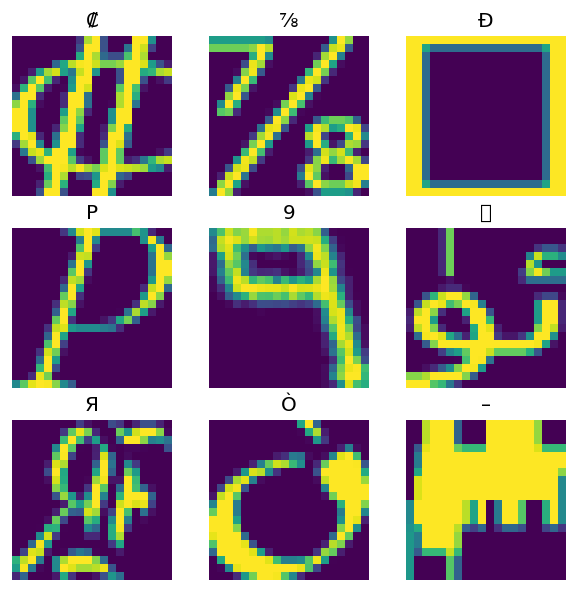

In [60]:
# plot the resulting image 

from matplotlib import pyplot as plt 

plt.figure(figsize = (6,6), dpi = 120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][...,n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

## Lower level functions 

more advanced techniques 
tf.io.decode_csv - a function for parsing lines of text into a list of CSV column tensors.
tf.data.experimental.CsvDataset - a lower level csv dataset constructor.
This section recreates functionality provided by make_csv_dataset, to demonstrate how this lower level functionality can be used.



#### tf.io.decode_csv 

this function decodes a string of list of strings into a list of columns




In [62]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [63]:
features = tf.io.decode_csv(lines, record_defaults= all_strings)
for f in features:
  print(f"type:{f.dtype.name}, shape: {f.shape}")

type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)


In [64]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [67]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [68]:
features = tf.io.decode_csv(lines, record_defaults= titanic_types)

for f in features:
  print(f"type:{f.dtype.name}, shape: {f.shape}")

type:int32, shape: (627,)
type:string, shape: (627,)
type:float32, shape: (627,)
type:int32, shape: (627,)
type:int32, shape: (627,)
type:float32, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)
type:string, shape: (627,)


# tf.data.experimental.CsvDataset
The tf.data.experimental.CsvDataset class provides a minimal CSV Dataset interface without the convenience features of the make_csv_dataset function: column header parsing, column type-inference, automatic shuffling, file interleaving.

This constructor follows uses record_defaults the same way as io.parse_csv

In [70]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


The above code is equivalent to 

In [71]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    #load lines 
    tf.data.TextLineDataset(titanic_file_path)
    #skip header row 
    .skip(1)
    #decode the line 
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


## Multiple files 
To parse the fonts dataset using experimental.CsvDataset, you first need to determine the column types for the record_defaults. Start by inspecting the first row of one file:


In [72]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

Only the first two fields are strings, the rest are ints or floats, and you can get the total number of features by counting the commas:

In [73]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

The CsvDatasaet constructor can take a list of input files, but reads them sequentially. The first file in the list of CSVs is AGENCY.csv:

In [74]:
font_csvs[0]

'fonts/AGENCY.csv'

So when you pass pass the list of files to CsvDataaset the records from AGENCY.csv are read first:

In [75]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults = font_column_types,
    header = True
)

for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


To interleave multiple files, use Dataset.interleave.

Here's an initial dataset that contains the csv file names:

In [76]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

This shuffles the file name each epoch :

In [77]:
print('Epoch 1:')

for f in list(font_files)[:5]:
  print("    ",f.numpy())
print('   ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ",f.numpy())
print('   ...')

Epoch 1:
     b'fonts/MATURA.csv'
     b'fonts/FELIX TITLING.csv'
     b'fonts/TREBUCHET.csv'
     b'fonts/EUROROMAN.csv'
     b'fonts/REFERENCE.csv'
   ...

Epoch 2:
     b'fonts/MODERN.csv'
     b'fonts/VLADIMIR.csv'
     b'fonts/BERLIN.csv'
     b'fonts/CASTELLAR.csv'
     b'fonts/PHAGSPA.csv'
   ...


The interleave method takes a map_func that creates a child-Dataset for each element of the parent-Dataset.

Here, you want to create a CsvDataset from each element of the dataset of files:

In [78]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
      path,
      record_defaults = font_column_types,
      header = True
  )



The Dataset returned by interleave returns elements by cycling over a number of the child-Datasets. Note, below, how the dataset cycles over cycle_length)=3 three font files:

In [79]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length = 3)

In [81]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

,font_name,character
0,BITSTREAMVERA,J
1,BAUHAUS,
2,TW,ﬂ
3,BITSTREAMVERA,Z
4,BAUHAUS,
5,TW,ﬁ
6,BITSTREAMVERA,D
7,BAUHAUS,◊
8,TW,
9,BITSTREAMVERA,S


## Performancewith cahching

Earlier, it was noted that io.decode_csv is more efficient when run on a batch of strings.

It is possible to take advantage of this fact, when using large batch sizes, to improve CSV loading performance (but try caching first).

With the built-in loader 20, 2048-example batches take about 17s.[link text](https://)

In [82]:
BATCH_SIZE = 2048

fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size = BATCH_SIZE, num_epochs = 1,
    num_parallel_reads = 100

)

In [83]:
%%time 

for i,batch in enumerate(fonts_ds.take(20)):
  print('.', end = '')

print()

....................
CPU times: user 19.1 s, sys: 1.42 s, total: 20.5 s
Wall time: 15.9 s


Passing batches of text lines todecode_csv runs faster, in about 5s:



In [84]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1),
    cycle_length = 100
).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x : tf.io.decode_csv(x, record_defaults=font_column_types))

In [85]:
%%time 

for i, batch in enumerate(fonts_fast.take(20)):
  print('.', end = '')

print()

....................
CPU times: user 5.4 s, sys: 40.1 ms, total: 5.44 s
Wall time: 4.61 s
